(19, 3000)


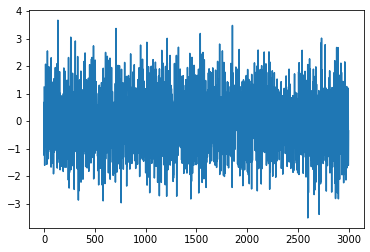

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from wptemd.wptemd import wptemd

fs = 500
data = np.random.randn(19,6*fs)
wptemd = wptemd()
wp_filtered = wptemd.wpt_filter(data)
print(wp_filtered.shape)
plt.plot(wp_filtered[0,:])